# Measure row straightness
## Author: Miles Roberts
## Last updated: 2021-03-05
## Goals:
* Create binary images of corn kernels
* Measure row straightness on pre-processed corn photos
    * Try measuring entropy of image as a measure of corn kernel "disorderliness"
    * Dirk mentioned that a Fourier transform might help with this, so try that out too

In [1]:
#The following code snip-it reads any file from the internet and saves it to your local directory.
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
from skimage import exposure #histogram equalization
import colorsys #To convert to rbg to hsv color space
import matplotlib.colors as colors
import os #For getting list of files
from scipy import ndimage #For performing erosion and dilation
import matplotlib.colors as colors
from ipywidgets import interactive,fixed #For interactives
import skimage.measure #Use to measure entropy of binary image

#Get list of photo names
fileNames = os.listdir(path='.\croppedCornPhotos')
print(fileNames)
os.chdir(path='.\croppedCornPhotos')

for fileName in fileNames:
    im = imread(fileName)
    #Thresholding
    #Define thresholds for isolating tray in photos
    hmin = 0.11
    hmax = 0.20
    smin = 0.20
    smax = 1.01
    vmin = -1
    vmax = 256

    #convert from rgb to hsv color space, pull out matrices
    hsv = colors.rgb_to_hsv(im)
    h = hsv[:,:,0]; #hue matrix
    s = hsv[:,:,1]; #saturation matrix
    v = hsv[:,:,2]; #value matrix (i.e. brightness)
    
    #Convert to binary image based on thresholds
    # trick because the color space wraps
    if hmin > hmax:
        b_img = (h > hmin) | (h < hmax)
    else:
        b_img = (h > hmin) & (h < hmax);
        b_img = (b_img & 
            (s > smin) & (s < smax) & 
            (v > vmin) & (v < vmax));
    
    #Calculate entropy (i.e. disorder in pixel/kernel arangement)
    entropy = skimage.measure.shannon_entropy(b_img)
    imsave("binary_cropped_" + fileName, b_img * 255)
    print(fileName)
    print(entropy)

['cropped_IMG_8248.jpg', 'cropped_IMG_8270.jpg', 'cropped_IMG_8275.jpg', 'cropped_IMG_8277.jpg', 'cropped_IMG_8280.jpg', 'cropped_IMG_8284.jpg', 'cropped_IMG_8291.jpg', 'cropped_IMG_8302.jpg', 'cropped_IMG_8305.jpg', 'cropped_IMG_8312.jpg', 'cropped_IMG_8333.jpg', 'cropped_IMG_8338.jpg', 'cropped_IMG_8339.jpg', 'cropped_IMG_8340.jpg', 'cropped_IMG_8342.jpg', 'cropped_IMG_8343.jpg', 'cropped_IMG_8349.jpg']


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8248.jpg
0.6595879011249747


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8270.jpg
0.8551211877133899
cropped_IMG_8275.jpg
0.5563197520913086


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8277.jpg
0.9355385334468413


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8280.jpg
0.8468088744199466


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8284.jpg
0.9396065076545134


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8291.jpg
0.9085303312365205


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8302.jpg
0.17811947652502372


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8305.jpg
0.6558685942555501


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8312.jpg
0.992750612041978


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8333.jpg
0.9130091507443306


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8338.jpg
0.8695967212883786


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8339.jpg
0.5269355482970964


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8340.jpg
0.6493444177653592


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8342.jpg
0.3575946456662784


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8343.jpg
0.8005941008780185


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


cropped_IMG_8349.jpg
0.6408196481732823


# GRAVEYARD

In [1]:
#The following code snip-it reads any file from the internet and saves it to your local directory.
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
from skimage import exposure #histogram equalization
import colorsys #To convert to rbg to hsv color space
import matplotlib.colors as colors
import os #For getting list of files
from scipy import ndimage #For performing erosion and dilation
import matplotlib.colors as colors
from ipywidgets import interactive,fixed #For interactives

#Get list of photo names
fileNames = os.listdir(path='.\croppedCornPhotos')
print(fileNames)
os.chdir(path='.\croppedCornPhotos')

['cropped_IMG_8248.jpg', 'cropped_IMG_8270.jpg', 'cropped_IMG_8275.jpg', 'cropped_IMG_8277.jpg', 'cropped_IMG_8280.jpg', 'cropped_IMG_8284.jpg', 'cropped_IMG_8291.jpg', 'cropped_IMG_8302.jpg', 'cropped_IMG_8305.jpg', 'cropped_IMG_8312.jpg', 'cropped_IMG_8333.jpg', 'cropped_IMG_8338.jpg', 'cropped_IMG_8339.jpg', 'cropped_IMG_8340.jpg', 'cropped_IMG_8342.jpg', 'cropped_IMG_8343.jpg', 'cropped_IMG_8349.jpg']


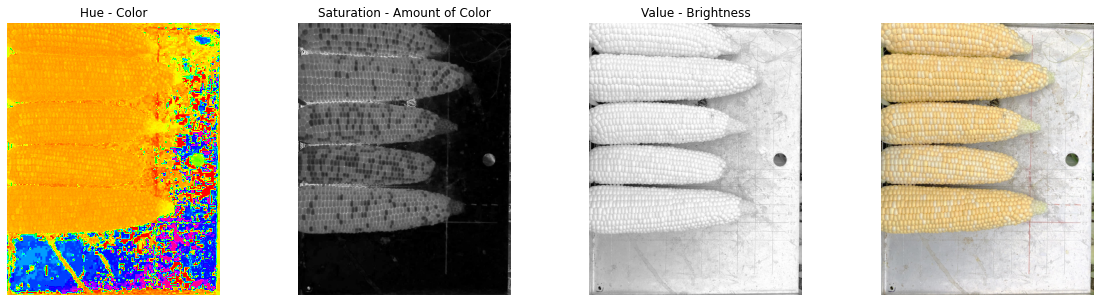

In [2]:
#Load picture
im = imread(fileNames[11])

hsv = colors.rgb_to_hsv(im)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.imshow(hsv[:,:,0], cmap='hsv')
ax1.set_title('Hue - Color')
ax1.set_axis_off()

ax2.imshow(hsv[:,:,1],cmap='gray',vmin=0, vmax=1)
ax2.set_title('Saturation - Amount of Color')
ax2.set_axis_off()

ax3.imshow(hsv[:,:,2],cmap='gray')
ax3.set_title('Value - Brightness')
ax3.set_axis_off()

ax4.imshow(im)
ax4.set_axis_off()

In [3]:
def hsv_color_threshold(im, hmin=-0.01,hmax=1.01, smin=-0.01,smax=1.01,vmin=-1,vmax=256):
    # Pull out the red, gree and blue matrixes
    hsv = colors.rgb_to_hsv(im)
    h = hsv[:,:,0];
    s = hsv[:,:,1];
    v = hsv[:,:,2];
    
    # trick because the color space wraps
    if hmin > hmax:
        b_img = (h > hmin) | (h < hmax)
    else:
        b_img = (h > hmin) & (h < hmax);
    
    
    b_img = (b_img & 
         (s > smin) & (s < smax) & 
         (v > vmin) & (v < vmax));
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    ax1.imshow(im)
    ax1.set_axis_off()
    
    ax2.imshow(b_img,cmap='gray', vmin=0, vmax=1)
    ax2.set_title('Value - Brightness')
    ax2.set_axis_off()

    plt.show()
    return b_img*1;

w = interactive(hsv_color_threshold, im=fixed(im),
         hmin=(-0.01,1.01,0.01), hmax=(-0.01,1.01,0.01), 
         smin=(-0.01,1.01,0.01), smax=(-0.01,1.01,0.01), 
         vmin=(-1,256), vmax=(-1,256),__manual=True);
w

interactive(children=(FloatSlider(value=-0.01, description='hmin', max=1.01, min=-0.01, step=0.01), FloatSlide…

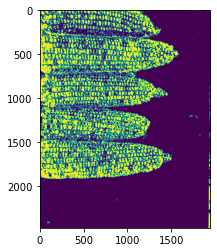

In [4]:
#Thresholding
#Define thresholds for isolating tray in photos
hmin = 0.11
hmax = 0.20
smin = 0.20
smax = 1.01
vmin = -1
vmax = 256

#convert from rgb to hsv color space, pull out matrices
hsv = colors.rgb_to_hsv(im)
h = hsv[:,:,0]; #hue matrix
s = hsv[:,:,1]; #saturation matrix
v = hsv[:,:,2]; #value matrix (i.e. brightness)
    
#Convert to binary image based on thresholds
# trick because the color space wraps
if hmin > hmax:
    b_img = (h > hmin) | (h < hmax)
else:
    b_img = (h > hmin) & (h < hmax);
    b_img = (b_img & 
        (s > smin) & (s < smax) & 
        (v > vmin) & (v < vmax));

plt.imshow(b_img)

[1091 1094 1141 ... 1915 1915 1915]


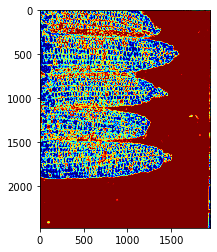

In [20]:
b_img
#Label objects in binary image
lab, num_features = ndimage.measurements.label(b_img)
plt.imshow(lab==0, cmap='jet')
#Sum togther rows and columns of binary array to determine which pixels represent the tray (labeled as object 1) 
a1 = np.sum(lab==0,axis=1)
a0 = np.sum(lab==0,axis=0)
print(a1)


In [22]:

entropy = skimage.measure.shannon_entropy(b_img)
print(entropy)

0.8695967212883786
